### 理解矩阵的本质，特征向量，特征值
https://jingyan.baidu.com/article/3065b3b68c6bb6becff8a488.html <br>
#### 1.一个矩阵其实就是一个线性变换
#### 2.线性变换有很多方向，描述好一个变换，那么只需要描述好这个变换的主要的变化方向就好
这其实是在平面上对一个轴进行的拉伸变换（如蓝色的箭头所示），在图中，蓝色的箭头是一个**最主要的变化方向**（变化方向可能有不止一个），如果我们想要描述好一个变换，那我们就描述好这个**变换主要的变化方向**就好了
#### 3.一个矩阵在高维空间下，这个变换也同样有很多的变换方向，我们通过特征值分解得到的前N个特征向量，那么就对应了这个矩阵最主要的N个变化方向。我们利用这前N个变化方向，就可以近似这个矩阵（变换）
总结一下，特征值分解可以得到特征值与特征向量，特征值表示的是这个特征到底有多重要，而特征向量表示这个特征是什么，可以将每一个特征向量理解为一个线性的子空间，我们可以利用这些线性的子空间干很多的事情
#### 4.PCA算法对输入数据具有缩放不变性，无论输入数据的值被如何放大（或缩小），返回的特征向量都不改变
<img src='pic/matrix_learn.png' width='30%' height='30%'>
<img src='pic/matrix_learn2.png' width='30%' height='30%'>

### 理解PCA
官方教程：http://deeplearning.stanford.edu/wiki/index.php/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90 <br>
PCA理论可以参考我之前写的一篇简书：https://www.jianshu.com/p/6a70d95c5d8b <br>

如果对上面说的矩阵的本质，特征向量，特征值有了比较好的理解，**那么PCA就很容易理解了** <br>
#### 1.通过计算数据集的协方差矩阵 <br>
#### 2.计算协方差矩阵的特征向量和特征值，即获得主要变化的方向，即主成分 <br>
#### 3.计算原始数据在特征向量上的映射，即投影,也可以说为旋转，变换 <br>
<img src='pic/matrix_rotate.png' width="80%" height="45%">


### 课程习题

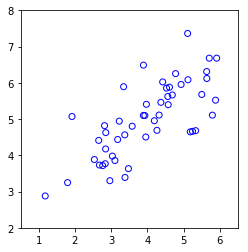

In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt


mat_data = sio.loadmat('data/ex7data1.mat')
X = mat_data['X']

plt.figure()
plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='b')
plt.xlim(0.5, 6.5)
plt.ylim(2, 8)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [3]:
def feature_normalize(X):
    """
    Normalizes the features in X.
    
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [43]:
# svd:https://www.cnblogs.com/daniel-D/p/3218063.html
# 可以看下PCA原理，数据降维最后就是求协方差矩阵的特征向量，svd方法返回的U就是特征向量，S是对角矩阵，对角线就是其特征值
def pca(X):
    """
    Run principal component analysis on the dataset X.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.

    Returns
    -------
    U : ndarray, shape (n_features, n_features)
        Unitary matrices.
    S : ndarray, shape (n_features,)
        The singular values for every matrix.
    V : ndarray, shape (n_features, n_features)
        Unitary matrices.
    """
    m, n = X.shape
    sigma = X.T.dot(X) / m
    print 'variance matrix sigma.shape', sigma.shape
    U, S, V = np.linalg.svd(sigma)
    return U, S, V


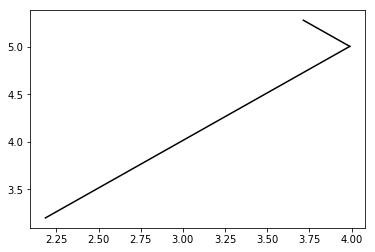

Top eigenvector:
U =  [-0.70710678 -0.70710678]
(you should expect to see -0.70710678 -0.70710678)


In [5]:
from draw_line import draw_line


#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = feature_normalize(X)

# Run PCA
U, S, V = pca(X_norm)

plt.figure()
draw_line(mu, mu + 1.5 * S[0] * U[:,0].T)
draw_line(mu, mu + 1.5 * S[1] * U[:,1].T)
plt.show()

print 'Top eigenvector:'
print 'U = ', U[:, 0]
print '(you should expect to see -0.70710678 -0.70710678)'

In [6]:
def project_data(X, U, K):
    """
    Computes the reduced data representation when projecting only on to the top K eigenvectors.
    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    U : ndarray, shape (n_features, n_features)
        Unitary matrices.
    K : int
        Reduced dimension.

    Returns
    -------
    Z : ndarray, shape (n_samples, K)
        The projection of X into the reduced dimensional space spanned by the first K columns of U.
    """
    Z = X.dot(U[:, 0:K])
    return Z


In [7]:
# m*n x n*k -> m*k   recover:结果乘以矩阵的转置:   m*k x k*n -> m*n  还原,但还原后，每一项的值还是不等的
def recover_data(Z, U, K):
    """
    Recovers an approximation of the original data when using the projected data.
    
    Parameters
    ----------
    Z : ndarray, shape (n_samples, K)
        The projected data, where n_samples is the number of samples and K is the number of reduced dimensions.
    U : ndarray, shape (n_features, n_features)
        Unitary matrices, where n_features is the number of features.
    K : int
        Reduced dimension.

    Returns
    -------
    X_rec : ndarray, shape (n_samples, n_features)
        The recovered samples.
    """
    X_rec = Z.dot(U[:, 0:K].T)
    return X_rec

Projection of the first example:  [ 1.48127391]
(this value should be about 1.48127391)
Approximation of the first example: [-1.04741883 -1.04741883]
(this value should be about  -1.04741883 -1.04741883)


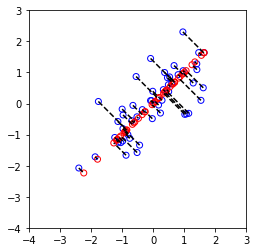

In [16]:
# Plot the normalized dataset (returned from pca)
plt.figure()
plt.scatter(X_norm[:, 0], X_norm[:, 1], facecolors='none', edgecolors='b')
plt.xlim(-4, 3)
plt.ylim(-4, 3)
plt.gca().set_aspect('equal', adjustable='box')

# Project the data onto K = 1 dimension
K = 1
Z = project_data(X_norm, U, K)
print 'Projection of the first example: ', Z[0, ]
print '(this value should be about 1.48127391)'

X_rec = recover_data(Z, U, K)
print 'Approximation of the first example:', X_rec[0, ]
print '(this value should be about  -1.04741883 -1.04741883)'

# Draw lines connecting the projected points to the original points
plt.scatter(X_rec[:, 0], X_rec[:, 1], facecolors='none', edgecolors='r')
for i in range(X_norm.shape[0]):
    draw_line(X_norm[i,:], X_rec[i,:], dash=True)
axes = plt.gca()
axes.set_xlim([-4, 3])
axes.set_ylim([-4, 3])
axes.set_aspect('equal', adjustable='box')
plt.show()

### Part 4: Loading and Visualizing Face Data

X.shape =  (5000, 1024)


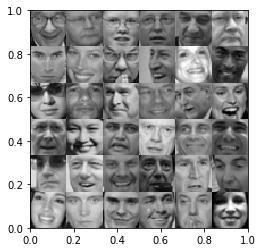

In [49]:
from display_data import display_data


# Load Face dataset
mat_data = sio.loadmat('data/ex7faces.mat')
X = mat_data['X']
print 'X.shape = ',X.shape
plt.figure()
# display_data(X[0:100, :])
display_data(X[0:36])
plt.show()

### Part 5: PCA on Face Data: Eigenfaces 

variance matrix sigma.shape (1024, 1024)
U.shape  (5000, 1024) (1024, 1024) (1024,) (1024, 1024)


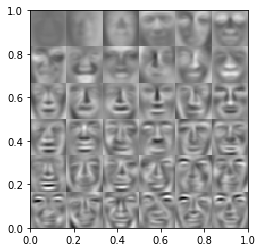

In [51]:
X_norm, mu, sigma = feature_normalize(X)

# Run PCA
U, S, V = pca(X_norm)

print 'U.shape ',X_norm.shape, U.shape, S.shape, V.shape


# Visualize the top 36 eigenvectors found
plt.figure()
display_data(U[:, 0:36].T)
plt.show()

### Part 6: Dimension Reduction for Faces 
Reduce the dimension of the sample from 1024 (32 by 32) to 100:

The projected data Z has a size of: (5000, 80)
test : (5000, 1024) (5000, 1024)


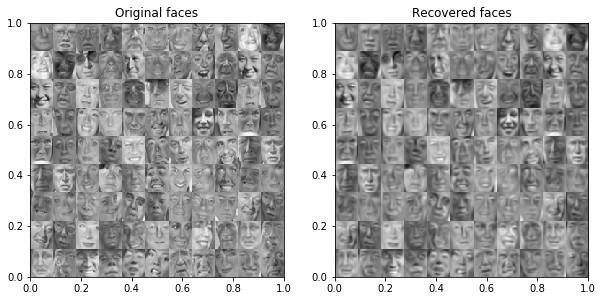

In [48]:
K = 80
Z = project_data(X_norm, U, K)

print 'The projected data Z has a size of:', Z.shape

X_rec = recover_data(Z, U, K)
print 'test :',X_norm.shape,X_rec.shape
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 2, 1)
display_data(X_norm[1:100,:], axes=ax1)
ax1.set_title('Original faces')
ax2 = fig.add_subplot(1, 2, 2)
display_data(X_rec[1:100,:], axes=ax2)
ax2.set_title('Recovered faces')
plt.show()